# Analysis of Infected Population in Spain

First we import all the libraries to use for our data analysis.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from models.data_gatherer import DataReader

np.set_printoptions(suppress=True)

We filter data given a specific country. So that it is easier to handle.

In [2]:
data = DataReader()
# interestCountry = input("Please enter a country name\n")
mx = data.get_country_data("MX")

Now, we proceed to sort data so that it is easily handled to be plotted in a matplotlib chart. We start by retrieving the sick population.

In [3]:
# Set the variable for the population size of the selected country
# popSize = input("introduce the population size for your country")
pop_size = mx.pop_size
confirmedCases = mx.get_cases(acc=True) / float(pop_size) * 100.0
confirmedCasesTotal = mx.get_cases(acc=True)
# recoveredCases = [row['Recovered']/popSize * 100 for _, row in filteredData.iterrows()]
deathCases = mx.get_deaths()
dates = mx.get_dates()

deathsPercent = [ x/confirmedCases[i]/float(pop_size)*100 if confirmedCases[i] != 0.0 else 0.0 for i, x in enumerate(deathCases)]
previousData = 0
ccR = mx.get_growth_rate(mx.get_cases(acc=True))

Array [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     2.     4.     5.     7.    11.    16.    26.    41.    53.    82.
    93.   118.   164.   203.   251.   316.   367.   405.   475.   585.
   717.   848.   993.  1094.  1215.  1378.  1510.  1688.  1890.  2143.
  2439.  2785.  3181.  3441.  3844.  4219.  4661.  5014.  5399.  5847.
  6297.  6875.  7497.  8261.  8772.  9501. 10544. 11633. 12872. 13842.
 14677. 15529. 16752. 17799. 19224. 20739. 22088. 23471. 24905. 26025.
 27634. 29616. 31522. 33460. 35022. 36327. 38324. 40186. 42595. 45032.
 47144. 49219. 51633. 54346. 56594. 59567. 62527. 65856.]


## Confirmed Cases
The following plot shows the accounted number of confirmed cases as a percentage of the population, were the exponential rate of the virus spread is shown. 

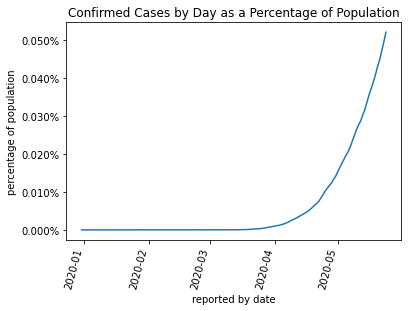

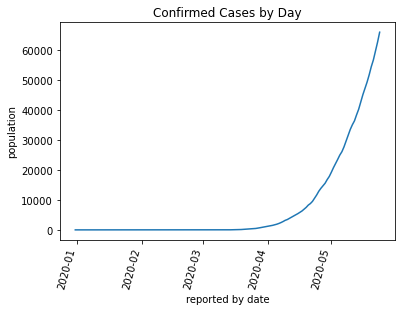

In [4]:
# beautify the Plot
fig, ax = plt.subplots()
ax.plot(dates, confirmedCases)
ax.set_title("Confirmed Cases by Day as a Percentage of Population")
ax.set_xlabel("reported by date")
ax.set_ylabel("percentage of population")
ax.yaxis.set_major_formatter(PercentFormatter())

plt.setp(ax.get_xticklabels(), rotation=75, ha='right')
plt.show()

fig, ax = plt.subplots()
ax.plot(dates, confirmedCasesTotal)
ax.set_title("Confirmed Cases by Day")
ax.set_xlabel("reported by date")
ax.set_ylabel("population")

plt.setp(ax.get_xticklabels(), rotation=75, ha='right')
plt.show()

## Rate of Growth by Day

[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   2.           2.           2.5          2.8          3.92857143
   4.07272727   6.38392857   6.42237762   8.25239547   9.93650877
   9.35942413  12.60761328  13.0080132   15.60576522  16.08379957
  19.64709885  18.67960267  21.68140336  21.90817597  26.70235993
  26.85155926  31.58103378  31.44292258 

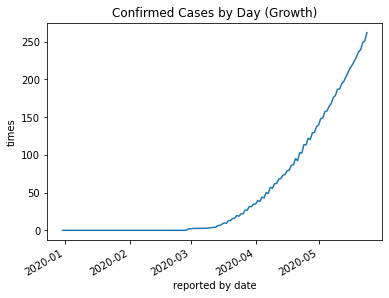

In [5]:
print(ccR)
firstDay = mx.calculate_first_day()
totalDays = 0
avgRate = 0.0
for i, rate in enumerate(ccR):
    if i >= firstDay:
        avgRate += rate
        totalDays += 1

avgRate = avgRate/totalDays
print("Average Rate of Growth: ", avgRate)        
fig, ax = plt.subplots()
ax.plot(dates, ccR)
ax.set_title("Confirmed Cases by Day (Growth)")
ax.set_xlabel("reported by date")
ax.set_ylabel("times")
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

The maximum rate of new confirmed cases ocurred between March 23rd and the 24th reaching a massive 3x, after this time the rate seemed to continiously decrease over time, perhaps by government lockdown instructions. Confirmation on the factors that cause the decrease in the rate change will be discussed later.

## Cases Resulting in Death

In [6]:
rateNp = np.array(ccR)
avgInfectionRate = np.average(rateNp)
avgInfectionRate = avgRate
print("Rate of Change for Confirmed Cases Average: ", avgInfectionRate)

Rate of Change for Confirmed Cases Average:  96.18935451995472
